<a href="https://colab.research.google.com/github/vaseline555/Course__Blockchain-based-Electronic-Lab-Notebook/blob/master/exercise/MGE511_02_Linear_Neural_Network_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Mar 30 07:21:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import torch
import torch.nn as nn
import torch.optim as opt

In [0]:
import sys
sys.path.insert(0, '..')

In [0]:
import torchvision
import torchvision.transforms as transforms

In [0]:
mnist_transform = transforms.Compose([transforms.ToTensor()])

mnist_train = torchvision.datasets.MNIST(root='./', train=True, download=True, transform=mnist_transform)
mnist_test = torchvision.datasets.MNIST(root='./', train=False, download=True, transform=mnist_transform)

In [0]:
from torch.utils.data import DataLoader

BATCH_SIZE = 6
train_loader = DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True)

torch.Size([6, 1, 28, 28])
tensor([5, 6, 8, 4, 6, 1])


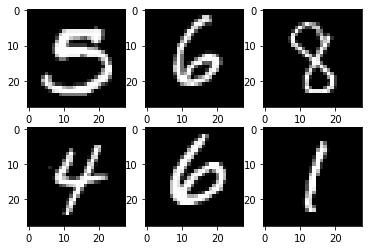

In [7]:
import matplotlib.pyplot as plt

for X, y in train_loader:
  print(X.shape)
  print(y)

  fig = plt.figure()
  for i in range(BATCH_SIZE):
    plt.subplot(2, BATCH_SIZE // 2, i + 1)
    plt.imshow(X[i].reshape(X[i].shape[1], -1), cmap='gray')
  break

In [0]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.layer = nn.Linear(28 * 28, 10, bias=True)

  def forward(self, inputs):
    inputs = inputs.view(-1, 28 * 28)
    outputs = self.layer(inputs)

    return outputs

In [0]:
model = LinearRegressionModel().cuda()

In [10]:
print(model.layer.weight.data.shape)
print(model.layer.bias.data.shape)

torch.Size([10, 784])
torch.Size([10])


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = opt.SGD(model.parameters(), lr=0.005)

In [0]:
BATCH_SIZE = 128
train_loader = DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=True)

NUM_EPOCHS = 200
loss_graph = {'train': [], 'test': [], 'epoch': []}

In [13]:
for epoch in range(NUM_EPOCHS):
  for X_train, y_train in train_loader:
    y_pred_train = model(X_train.cuda())
    
    loss = criterion(y_pred_train, y_train.cuda())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if epoch % 10 == 0:
    loss = criterion(y_pred_train, y_train.cuda())
    loss_graph['train'].append(loss)

    count = 0
    for X_test, y_test in test_loader:
      
      with torch.autograd.no_grad():
        y_pred_test = model(X_test.cuda())
        correct = torch.sum(torch.argmax(y_pred_test.cuda(), dim=1) == y_test.cuda())
        count += correct.cpu().numpy()

    loss_test = criterion(y_pred_test.cuda(), y_test.cuda())
    loss_graph['test'].append(loss_test)
    loss_graph['epoch'].append(epoch)

    print(f'\n[INFO] Test accuracy: {count / 10000 * 100:.2f} %')
    print(f'[INFO] Epoch: {epoch + 1}, Train Loss: {loss:.4f}, Test Loss: {loss_test:.4f}')


[INFO] Test accuracy: 81.76 %
[INFO] Epoch: 1, Train Loss: 1.1495, Test Loss: 1.1543

[INFO] Test accuracy: 88.93 %
[INFO] Epoch: 11, Train Loss: 0.4706, Test Loss: 0.5989

[INFO] Test accuracy: 90.09 %
[INFO] Epoch: 21, Train Loss: 0.3125, Test Loss: 0.5874

[INFO] Test accuracy: 90.61 %
[INFO] Epoch: 31, Train Loss: 0.2610, Test Loss: 0.1310

[INFO] Test accuracy: 90.95 %
[INFO] Epoch: 41, Train Loss: 0.3914, Test Loss: 0.6686

[INFO] Test accuracy: 91.14 %
[INFO] Epoch: 51, Train Loss: 0.4628, Test Loss: 0.4260

[INFO] Test accuracy: 91.39 %
[INFO] Epoch: 61, Train Loss: 0.2460, Test Loss: 0.5941

[INFO] Test accuracy: 91.54 %
[INFO] Epoch: 71, Train Loss: 0.2009, Test Loss: 0.3348

[INFO] Test accuracy: 91.63 %
[INFO] Epoch: 81, Train Loss: 0.2077, Test Loss: 0.2495

[INFO] Test accuracy: 91.70 %
[INFO] Epoch: 91, Train Loss: 0.2901, Test Loss: 0.2351

[INFO] Test accuracy: 91.81 %
[INFO] Epoch: 101, Train Loss: 0.3252, Test Loss: 0.1588

[INFO] Test accuracy: 91.87 %
[INFO] Epoch

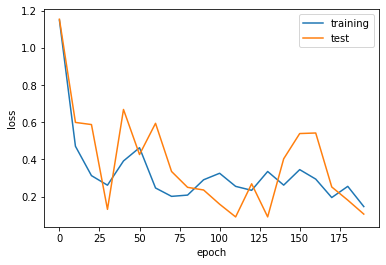

In [15]:
plt.plot(loss_graph['epoch'], loss_graph['train'], label='training')
plt.plot(loss_graph['epoch'], loss_graph['test'], label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()